# Contents :
* [Fully Connected Neural Networks](#Fully-Connected-Neural-Networks)
* [Understanding Convolution](#Understanding-Convolution)
    * [1D Convolution](#1D-Convolution)
        * [Going on a tangent , some interesting applications of 1d convolutions](#Going-on-a-tangent-,-some-interesting-applications-of-1d-convolutions)
    * [2D convolution](#2D-convolution)
        * [Understanding images](#Understanding-images)
        * [2D convolution operation](#2D-convolution-operation)
        * [Examples of 2D convolution](#Examples-of-2D-convolution)
    * [Applying some well known convolutional kernels](#Applying-some-well-known-convolutional-kernels)
    * [Understanding 2D convolution for a colored image](#Understanding-2D-convolution-for-a-colored-image)
    * [Convolutional-Terminologies-and-relationship](#Convolutional-Terminologies-and-relationship)
        * [Padding and Stride](#Padding-and-Stride)
* [From Convolution operations to neural networks](#From-Convolution-operations-to-neural-networks)
* [CNN Architectures](#CNN-Architectures)
    * [LeNet](#LeNet)
    * [Understanding components of LeNet](#Understanding-components-of-LeNet)
    * [LeNet in Pytorch](#LeNet-in-Pytorch)
    * [LeNet Class](#LeNet-Class)
    * [Visualizing intermediate layers](#Visualizing-intermediate-layers)
    

# Fully Connected Neural Networks 
Before jumping into CNNs, it is important to understand what came before them, the fully Connected Neural Networks.<br/>
Fully Connected Neural Networks: Any neuron in a given layer is fully connected to all the
neurons in the previous layer

Pros :
1. The Universal Approximation Theorem says that DNNs are power function approximators We can come up with a neural network of output f(x) which is very close to the true output f(x)
2. Easy to train 

Cons :
1. DNNs are prone to overfitting (too many parameters).Even a slight change in the training set could cause the model to arrive at very different weight configurations
2. Gradients can vanish due to long chains. Vanishing gradient problem could occur in the case of saturated neurons

It was because of these cons that reseach was put into better Optimization Algorithms, Better Activation Functions, and we came to questioning if we could make DNNs which are complex (many non-linearities) but have fewer parameters and
hence less prone to overfitting?


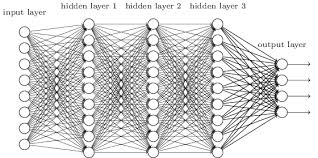

# Understanding Convolution

## 1D Convolution 

As per definition
The convolution of f and g is written f∗g, denoting the operator with the symbol '∗'.<br/>It is defined as the integral of the product of the two functions after one is reversed and shifted. As such, it is a particular kind of integral transform:
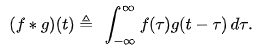

Let us try to understand this better, with an example <br/>

Assume that we are trying to measure the distance of a vehicle at regular intervals<br/>
$$x_0\ at\ t_0$$
$$x_1\ at\ t_1$$
$$x_2\ at\ t_2$$
but it so happens, that I am not really confident about my device, and to compenstate for that I take the average at multiple points resulting in distance at $t_2$ being $\frac{1}{3}*{(t_2+t_1+t_0)}$<br/>

However, if we think about it furthur ,we should try giving the most importance to the current reading, and a progressively decreasing level of importance to every reading preceding the current one. To implement this idea of importance we will assosiate weights to the distances<br/>

$$x_2 −> w_{0}\ (\ 0\ indicates\ current\ reference\ point\ )$$
$$x_1 −> w_{-1}\ (\ 1\ reading\ before\ reference\ point\ )$$
$$x_0 −> w_{-2}\ (\ 2\ reading\ before\ reference\ point\ )$$
$$such\ that\ w_0>w_{-1}>w_{-2} $$

So the new overall new distance  $xnew_{2}$ would be calculated by $w_{-2}x_0+w_{-1}x_{1}+w_{0}x_{2}$ where the weights
are decreasing from $w_0$<br/>

Hence the formula now becomes $$x_t=\sum_{0}^{3}{w_{-a}x_{t-a}}$$
Now I want to include more than 3 previous reading for calculating my present new reading and it so happens that
I have been recording the values for a really long time, so i make the appropriate adjustment to my formula
$$x_{t}=\sum_{0}^{\infty}{w_{-a}x_{t-a}}$$

Congratulations !! we have reached to a disrcreate representation of a convolution operation. If we are to take readings in a continuous manner we would obtain the integral form of operation
$$x_t=\int_{0}^{\infty}{w_{-a}x_{t-a}}da$$

### Going on a tangent , some interesting applications of 1d convolutions
1. [1D Convolutional Neural Networks for Time Series Modeling - Nathan Janos, Jeff Roach](https://www.youtube.com/watch?v=nMkqWxMjWzg)
2. [End-to-End Environmental Sound Classification using a 1D Convolutional Neural Network](https://www.groundai.com/project/end-to-end-environmental-sound-classification-using-a-1d-convolutional-neural-network/1)

## 2D convolution 
### Understanding images

All Images are composed of pixels which can take a range of values between 0 to 255 <br/>
While a black and white image can be represented in a 2 dimensional arrangement of pixels
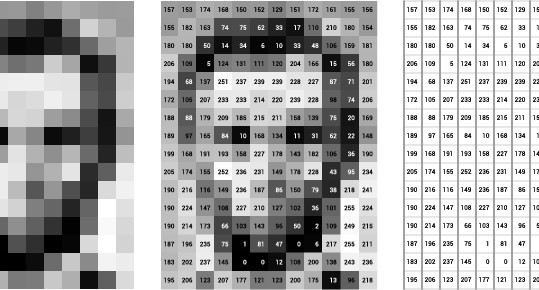

A colored RGB image ,has three 2D arrangement of pixels of red , green and blue color
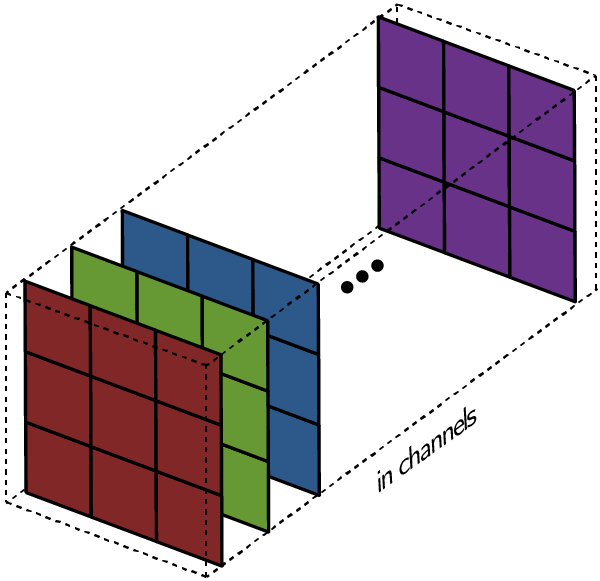


 ### 2D convolution operation 

In a nutshell, the convolution operation boils down to taking a given input and re-estimating it as
a weighted average of all the inputs around it.
The above definition is easy to visualise in 1D, but what about 2D?<br/>

Since images are presented in a 2D representation of pixels, the weights we will use will also have a 2D representation.<br/>
We go from a 1 D representation<br/>

|     |  |
| ----------- | ----------- |
| $w_1$      | $w_2$        | $w_3$ |

to a 2D representation of weights known as "kernal"

|     |  |
| ----------- | ----------- |
| $w_{11}$      | $w_{12}$        | $w_{13}$ |
| $w_{21}$      | $w_{22}$        | $w_{23}$ |
| $w_{31}$      | $w_{32}$        | $w_{33}$ |
<br/>
In 2D, we would consider neighbors along the rows and columns, using the following formula :
$$\sum_{a=0}^{m-1}\sum_{b=0}^{n-1}I_{i+a,j+b}*K_{a,b}$$
$$Where\ K\ refers\ to\ kernel\ or\ weights\ and\ I\ refers\ to\ the\ input\  and\ *\ refers\ to\ the\ convolution\ operation$$

|   K kernal  |  |
| ----------- | ----------- |
| $w_{00}$      | $w_{01}$        |
| $w_{10}$      | $w_{11}$        | 

1. Let a be the number of rows and b be the number of columns
2. m & n specify the size of the matrix, in this case we consider them to be 2 each. So it’s a 2x2 matrix. Therefore a & b range from 0-1 each.
3. Now, to calculate the new value at a particular pixel Ii,j, we simply need to fill in the values ino the formula.

$$s_{ij} = I_{i+0,j+0}K_{0,0} + I_{i+0,j+1}K_{0,1} + I_{i+1,j+0}K_{1,0} + I_{i+1,j+1}K_{1,1}$$





Our kernal will slide across an image, to calculate the required value <br/>

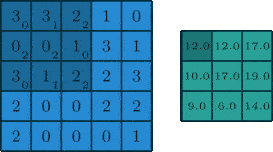


### Examples of 2D convolution
Kernals are used for variety of tasks in image processing, and we will now look at some well known kernals and their results and try to perform the operation in python
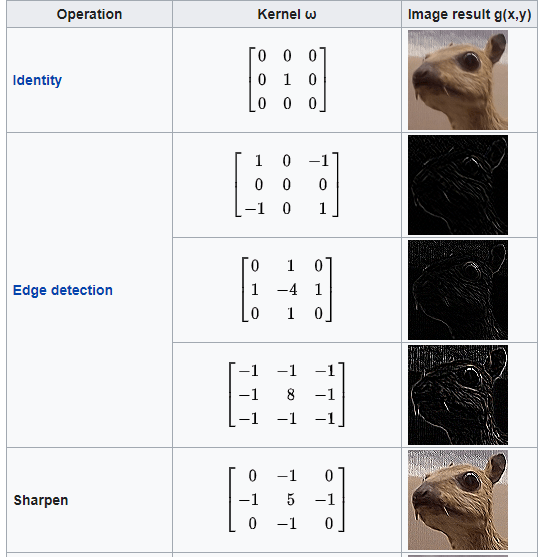


## Applying some well known convolutional kernels

### Importing stuff

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
img=Image.open('/kaggle/input/parrot-image/Grayscale_8bits_palette_sample_image.png')
img_array=-np.array(img)/255.0
plt.imshow(img_array,cmap='Greys',  interpolation='nearest')
plt.show()

### Some Well known kernels

In [ ]:
edge_kernal=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
sharpen_kernal=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
boxblur_kernal=np.ones((3,3))

In [ ]:
# Creating to store resulting images in 
res=np.zeros(img_array.shape)
res_sharpen=np.zeros(img_array.shape)
boxblur_res=np.zeros(img_array.shape)

# Logic is to iterate over every possible pixel on which convolution operation is possible
for i in range(1,img_array.shape[0]-2):
    for j in range(1,img_array.shape[1]-2):
        res[i,j]=(img_array[i:i+3,j:j+3]*edge_kernal).sum()
        res_sharpen[i,j]=(img_array[i:i+3,j:j+3]*sharpen_kernal).sum()
        boxblur_res[i,j]=(img_array[i:i+3,j:j+3]*boxblur_kernal).sum()/9
fig,ax=plt.subplots(1,3,figsize=(10,7))
ax[0].imshow(res,cmap='Greys')
ax[0].set_title('edge detection')
ax[1].imshow(res_sharpen,cmap='Greys')
ax[1].set_title('sharpen image')
ax[2].imshow(boxblur_res,cmap='Greys')
ax[2].set_title('blur')
plt.show()
        

## Understanding 2D convolution for a colored image
As we have discussed a colored image has 3 channels , a reg green and blue color channel. It is hence important to understand that our kernal will also have a 3 layer depth to it.
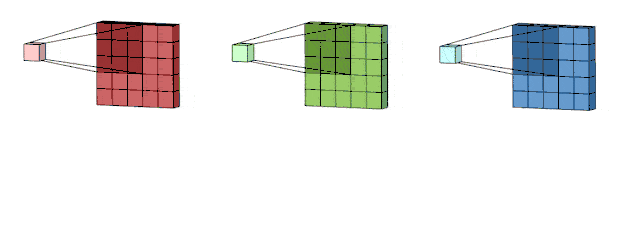
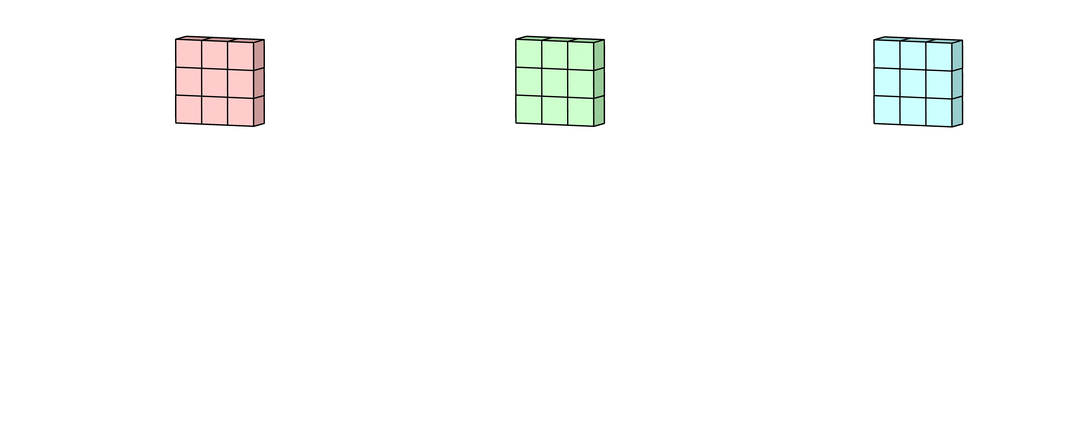

## Convolutional Terminologies and relationship

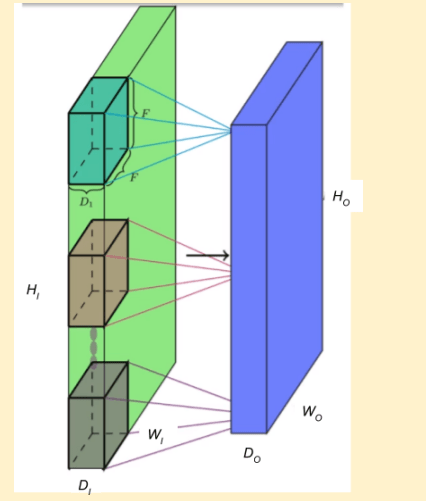
1. Input Width ($W_I$), Height ($H_I$) Depth ($D_I$)
2. Output Width ($W_0$), Height ($H_0$) and Depth ($D_0$)
3. The spatial extent of a filter (F), a single number to denote width and height as they are equal
4. Filter depth is always the same as the Input Depth ($D_I$)
5. The number of filters (K)

Performing the convolutional operation, shrinks down the image size because the kernal cannot be placed on the edges of the image i.e the kernal must overlapp with the image at all points<br/>
Hence the resultant relationship is
$$W_0=W_I-F+1$$
$$H_0=H_I-F+1$$

### Padding and Stride
However to allow convolutional opertation to be performed for all pixels of the image, the practice of Padding is taken into image <br/>
Let us consider adding extra rows+columns of zeros so that we can access all the image pixels
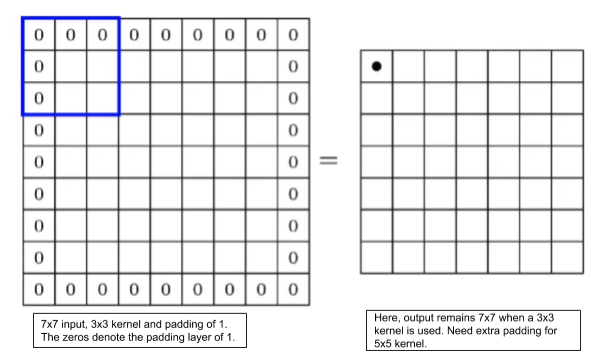
1. We can see that we must apply padding to preserve the output size
2. The bigger the kernel size, the larger the padding required.
3. Thus, the formulae from the last section can be updates as follows
     $$W_0=W_I-F+1+2P$$
     $$H_0=H_I-F+1+2P$$
     
Another term that we use is called stride (S). It also affects the size of the output image.The intuition behind stride is that when we have images of huge sizes, taking a convolutional operation at steps does not reult in loss of variational information.


$$W_0=\frac{W_I-F+2P}{S}+1$$

$$H_0=\frac{H_I-F+2P}{S}+1$$


    

# From Convolution operations to neural networks
While one way of image classification would be we apply some predefined convolutional filters like edge dectors and then feed the pixel valued to some sort of classification algorithm however in this method the transformation performed on the input image are static, without any learning per se, making it a hand-crafted set of features. The only learning that happens is inthe classifier.<br/>

However, in a deep Neural Network, the input features are not directly fed to the
classification/output layer, instead they are passed through hidden/representation layers, where
they are distilled down to more relevant features, before being passed into the classification layer.

This is why Deep Learning is also called Deep Representation Learning.<br/>
In the above case, we allow the DNN to learn the representation weights and apply it to the
features in steps, before finally passing it onto the output layer.

The question arises that Why not let the network learn the feature representation also? <br/>Why must we leave the choice of transformation to our
human intuition? Why can’t we let the DNN learn for itself the best transformation to apply?

This is where we join the two dots<br/>
The output of a convolutional operation becomes a neural layer and the weights of the multiple kernals become weights of the network , which will be changed with backpropagation with the goal of reducing loss<br/>
Here, we are not concerned with the type of transformation that occurs, so long as the overall
loss/error is reduced. 

The only difference between a DNN and what we’re looking at now (CNN) is that for a CNN
we only consider a small localised neighborhood of inputs when calculating the output, instead
of the entire input layer as in the case of DNNs.

In a nutshell, for CNNs, instead of learning the final classifier weights directly, we should also
learn to transform the input into a suitable representation through multiple layers of
representations and learn the kernel weights for all of those representations instead of using
hand-crafted kernels.

With CNNs we have achived the goal of more complex non linearitites with lesser weights and sparse connections

#### Some important points
1. In CNNs, weights are nothing but the kernel, and the kernel remains constant as we passover the entire image, creating different output values based on the neighborhood of inputs. One complete pass of the kernel over the image constitutes one Convolutional output.
2. As we have seen earlier, it is possible to have multiple convolutional operations by usingmultiple kernels over the input.
3. For each of these convoluted outputs, the kernel is constant, thereby the weights get sharedfor all the neurons in that output area. Only the inputs vary.
4. By combining all of these convolutional outputs, we get one convolutional layer
5. Instead of treating this Convolutional Layer as a flat vector, we treat it as a volume, whosedepth is given by the number of kernels used to process the input.
6. By this practice, we are effectively reducing the number of parameters yet still retaining modelcomplexity, thereby overcoming one of the shortcomings of DNNs.



# CNN Architectures
## LeNet
LeNet5 was one of the earliest convolutional neural networks and promoted the development of deep learning. Since 1988, after years of research and many successful iterations, the pioneering work has been named LeNet5.

The LeNet5 architecture was fundamental, in particular the insight that image features are distributed across the entire image, and convolutions with learnable parameters are an effective way to extract similar features at multiple location with few parameters. At the time there was no GPU to help training, and even CPUs were slow. Therefore being able to save parameters and computation was a key advantage. This is in contrast to using each pixel as a separate input of a large multi-layer neural network. LeNet5 explained that those should not be used in the first layer, because images are highly spatially correlated, and using individual pixel of the image as separate input features would not take advantage of these correlations.
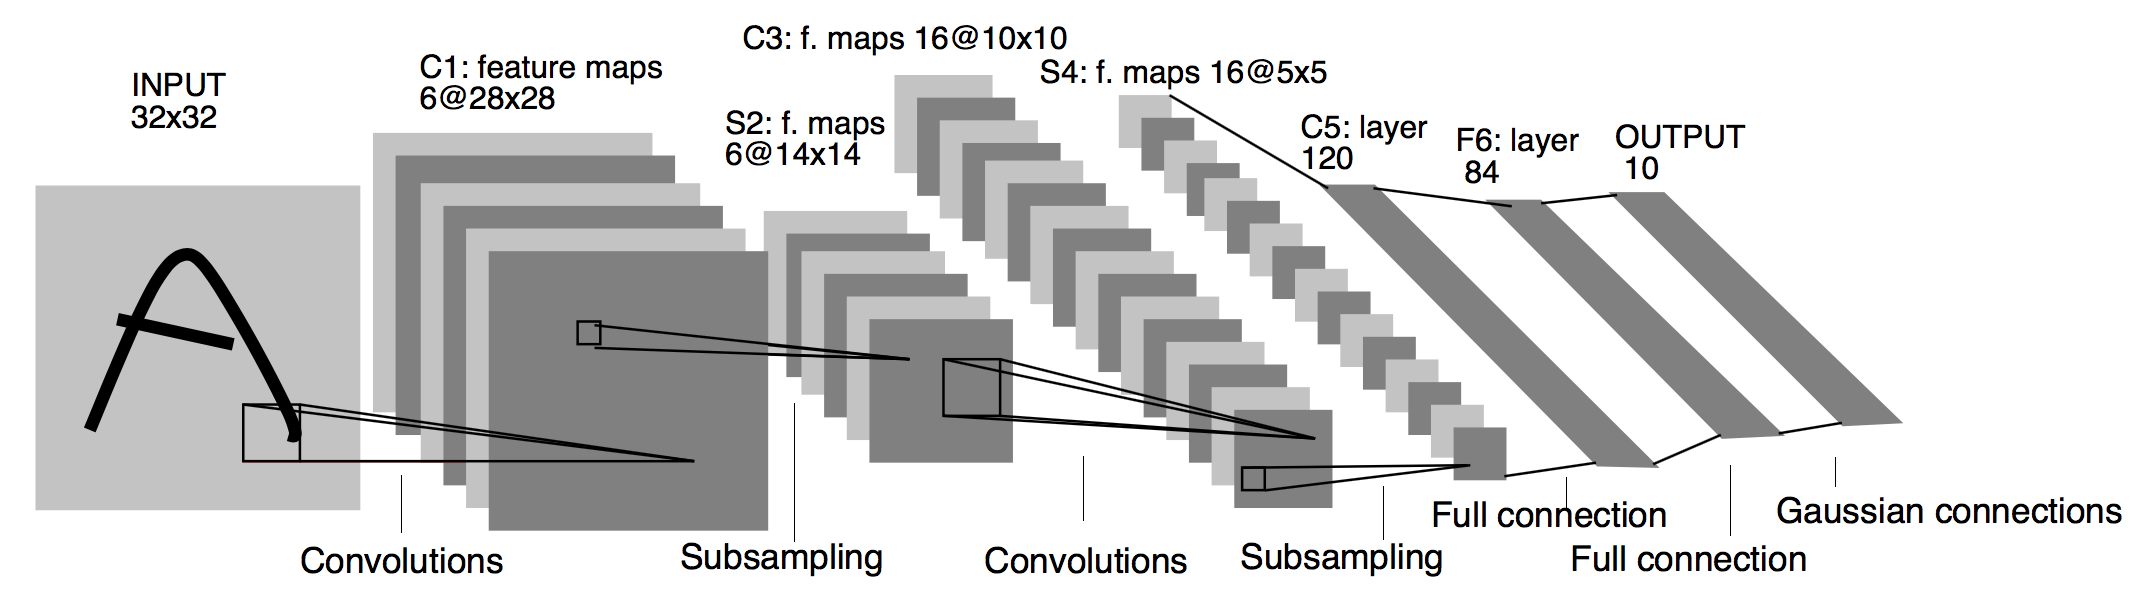

### Understanding components of LeNet

1. Convolution Layer 1

    1. Here, the filter size F = 5, and the central cell is the pixel of interest
    2. Stride length S = 1
    3. We use a total of 6 filters, i.e. K = 6
    4. No padding is used, i.e. P = 0
    5. Each of the filters generate 28x28 output (calculated using $W_0$, $H_0$ formula)
        1. $W_0 = \frac{32 +2*0 - 5}{1}+1$=28
        2. $H_0 = \frac{32 +2*0 - 5}{1}+1$=28
        3. $D_0=K=6$
    6. Non-linearity like tanh or ReLU(preferred for CNN) 
    
    
2. Max Pooling Layer 1

    1. Filter size F = 2
    2. Stride length S = 2
    3. No. of filters K = 6
    4. Padding P = 0
    5. $W_0 = \frac{28 +2*0 - 2}{2}+1$=14
    6. $H_0 = \frac{28 +2*0 - 2}{2}+1$=14
    7. $D_0=K=6$
    
    
3. Convolutional Layer 2

    1. Filter size F = 5
    2. Stride length S = 1
    3. No. of filters K = 16
    4. Padding P = 0
    5. $W_0 = \frac{14 +2*0 - 5}{1}+1$=10
    6. $H_0 = \frac{14 +2*0 - 5}{1}+1$=10
    7. $D_0=K=16$
    
4. Max Pooling Layer 2
    1. Filter size F = 2
    2. Stride length S = 2
    3. No. of filters K = 16
    4. $W_0 = \frac{10 +2*0 - 2}{2}+1$=5
    5. $H_0 = \frac{10 +2*0 - 2}{2}+1$=5
    6. $D_0=K=16$
    
5. Fully connected layer 
    1. Result after Max Pooling Layer 2 is flattened resulting in 5*5*16 =400 inputs
    2. Number of neurons: 120
    3. Number of neurons: 84
    4. Number of neurons: 10




### LeNet in Pytorch

#### Loading Data
[Guide to dataset and trainloader in Pytorch](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

In [ ]:
import torchvision
import torchvision.transforms as transforms
import torch
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='/kaggle/input/cifar10-python', train=True,transform=transform)
testset = torchvision.datasets.CIFAR10(root='/kaggle/input/cifar10-python', train=False,transform=transform)
batch_size = 128
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

allocating the cuda gpu

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

### LeNet Class
Parameters of Conv2d
> torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')

In [ ]:
import torch.nn as nn
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28) |in_channel=3 (rgb) out_channel=6 kernel=5|
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.ReLU(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.ReLU(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [ ]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
import torch.optim as optim
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(),eps=1e-08,weight_decay=0.001)

In [ ]:
%%time
loss_train=[]
loss_test=[]
max_epochs = 20                                                      

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

    loss_train.append(evaluation(trainloader))
    loss_test.append(evaluation(testloader))


    print('Epoch: %d/%d' % (epoch, max_epochs))

In [ ]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

In [ ]:
import seaborn as sns
sns.set()
plt.plot(loss_train,label='train')
plt.plot(loss_test)
plt.legend()

## Visualizing intermediate layers

In [ ]:
net

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
net = net.to('cpu')
img,labels=iter(testloader).next()

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
imgindx=9
ax[0].imshow(np.transpose(img[imgindx,:,:,:], (1, 2, 0)),cmap='viridis' )
ax[0].set_title(classes[labels[imgindx]])
ax[1].bar(classes,torch.nn.functional.softmax(net(img),dim=1)[imgindx].tolist())
plt.show()

In [ ]:
conv_channel=1
fig,ax=plt.subplots(int(net.cnn_model[conv_channel-1].out_channels/2),2,
                    figsize=(15,7*int(net.cnn_model[conv_channel-1].out_channels/2)))
ax=ax.flatten()
for i in range(net.cnn_model[conv_channel-1].out_channels):
    ax[i].imshow( net.cnn_model[0:conv_channel](img)[imgindx,i,:,:].detach().numpy() )
    ax[i].set_title('channel {}'.format(i))
plt.show()